# Iris-Exploratory-Data-Analysis-With-Machine-Learning

It's a complete data exploration notebook to prepare your data for predictive analysis. Let's get started

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation


In [3]:
#Load Iris.csv into a pandas dataFrame.
iris=pd.read_csv(r"C:\Users\vipulvm\Downloads\iris.csv")


In [4]:
#(Q) How many data points and features?
print(iris.shape)


(150, 5)


In [5]:
#(Q) what are the columnnames in our dataset?
print(iris.columns)

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')


Now, let's check our data. It's very important for any data scientist to look at the data.

In [6]:
iris.head() #first 5 rows

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [7]:
iris.tail() #bottom 5 rows

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [8]:
iris.info() #checking there are any inconsistencies/null-values in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


I am little bit curious so I want to see first 100 rows to get a more clear understanding of the data.

In [9]:
iris.head(100) # first 100 rows

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Versicolor
96,5.7,2.9,4.2,1.3,Versicolor
97,6.2,2.9,4.3,1.3,Versicolor
98,5.1,2.5,3.0,1.1,Versicolor


In [5]:
#(Q) How many data points for each class are present?
#(or) how many flowers for each species are present?
iris["variety"].value_counts()
#balanced-dataset vs imbalanced datasets
#iris is a balanced dataset as the number of data points for every class is same

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

Now, let's do some visual analysis

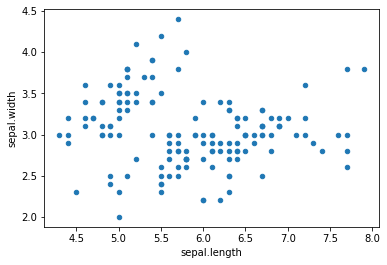

In [6]:
#2d scatter plot:
#always understand the axis:labels and scale.
iris.plot(kind='scatter',x='sepal.length',y='sepal.width');
plt.show()
#cannot make such sense out of it.
#what if color the points by thier class-label/flower-type graph not starting from 0,

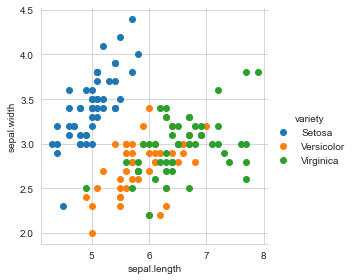

In [7]:
#2d scatter plot with clor coding for each flower type/class.
#here 'sns'corresponds to seaborn.
sns.set_style("whitegrid");
sns.FacetGrid(iris,hue="variety",height=4) \
 .map(plt.scatter,"sepal.length","sepal.width") \
 .add_legend();
plt.show();
#notice that blue point can easily seperated
#from red and green by drawing line.
#but red and green data points cannot be easily seperated.
#can we draw multiple 2d scatter plots for each combination of features.
#how many cmbination exist? 4c2 = 6. #legend is box showing features on right

observations
using sepal.length and sepal.width features we can distinguish setosa flowers from oth
sepertiong versicolor from viginicia is much harder as they have considerable overlap.

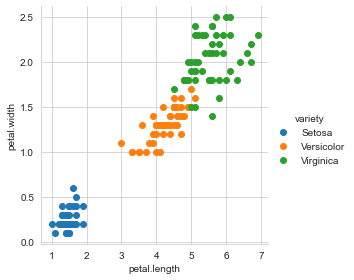

In [11]:
sns.set_style("whitegrid");
sns.FacetGrid(iris,hue="variety",height=4) \
 .map(plt.scatter,"petal.length","petal.width") \
 .add_legend();
plt.show();

We can see that the Petal Features are giving a better cluster division compared to the Sepal features. This is an indication that the Petals can help in better and accurate Predictions over the Sepal.

Now let us see how are the length and width are distributed

3d scatter plot
https://plotly.com/python/3d-scatter-plots/

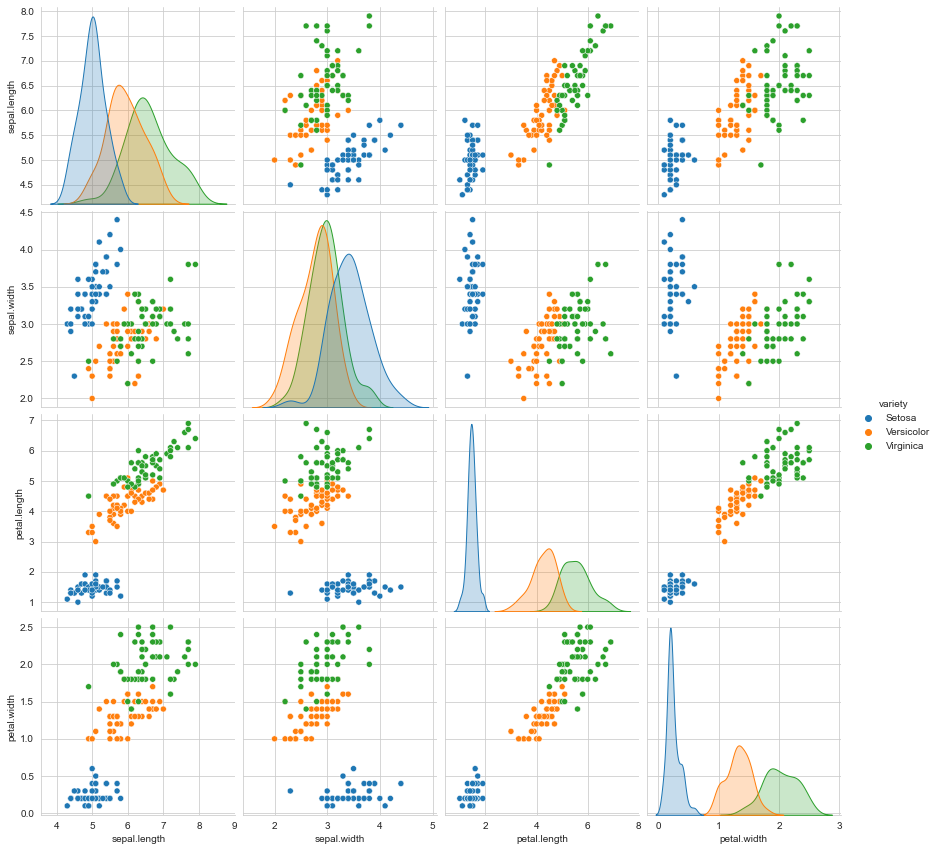

In [7]:
#pairwise scatterplot: Pair-plot
#dis-advantages:
#can be used when number of features are high.
#cannot visualize higher dimentional patterns in 3-D and 4-D.
#only possible to view 2D patterns.
plt.close();
sns.set_style("whitegrid");
sns.pairplot(iris,hue="variety",height=3); #4c2 total combinations
plt.show()
#note:the diagonal elements are pdfs for each features.Pdfs are explained

# observations from pair plots:
Pair plot represents the relationship between our target and the variables. We can see that the setosa species has a large difference in its characteristics when compared to the other species, it has smaller petal width and length while its sepal width is high and its sepal length is low. Similar kind of conclusions can be drawn for the other species like the Versicolor species usually have average dimensions whether it is sepal or petal. While virginica has high petal width and length while it has small sepal width but large sepal length.

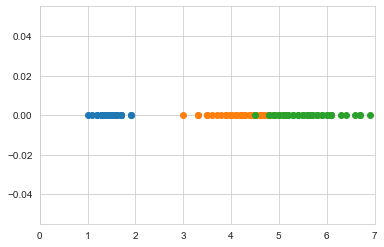

In [28]:
# What about 1-D scatter plot using just one feature?
#1-D scatter plot of petal-length
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
iris_setosa = iris.loc[iris["variety"] == "Setosa"];
iris_virginica = iris.loc[iris["variety"] == "Virginica"];
iris_versicolor = iris.loc[iris["variety"] == "Versicolor"];
#print(iris_setosa["petal_length"])
plt.plot(iris_setosa["petal.length"], np.zeros_like(iris_setosa['petal.length']), 'o')
plt.plot(iris_versicolor["petal.length"], np.zeros_like(iris_versicolor['petal.length']), 'o')
plt.plot(iris_virginica["petal.length"], np.zeros_like(iris_virginica['petal.length']), 'o')
plt.xlim(0,7);
plt.show();
#Disadvantages of 1-D scatter plot: Very hard to make sense as points 
#are overlapping a lot.
#Are there better ways of visualizing 1-D scatter plots?

C:\Users\vipulvm\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\vipulvm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vipulvm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vipulvm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `d

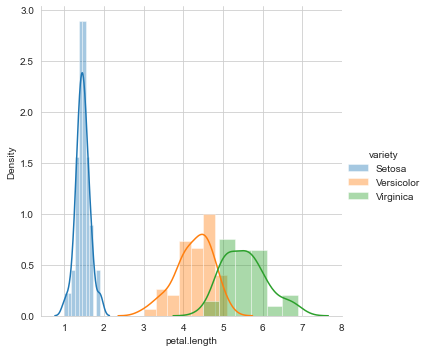

In [9]:
sns.FacetGrid(iris,hue="variety",size=5) \
   .map(sns.distplot,"petal.length") \
   .add_legend();
plt.show();

C:\Users\vipulvm\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\vipulvm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vipulvm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vipulvm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `d

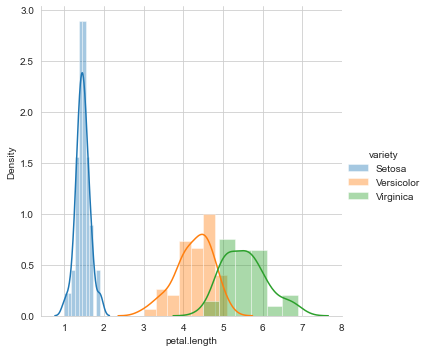

In [36]:
sns.FacetGrid(iris, hue="variety", size=5) \
   .map(sns.distplot, "petal.length") \
   .add_legend();
plt.show();




C:\Users\vipulvm\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\vipulvm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vipulvm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vipulvm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `d

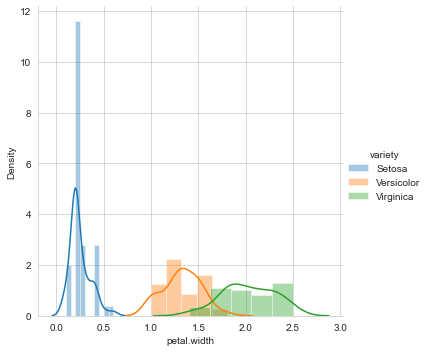

In [11]:
sns.FacetGrid(iris, hue="variety", size=5) \
   .map(sns.distplot, "petal.width") \
   .add_legend();
plt.show();

C:\Users\vipulvm\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\vipulvm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vipulvm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vipulvm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `d

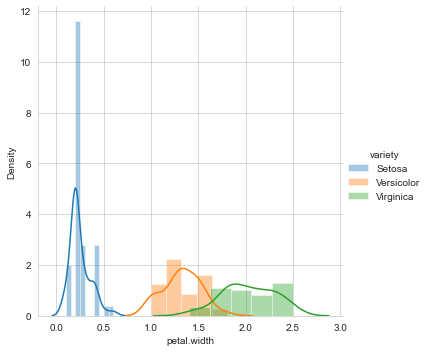

In [37]:
sns.FacetGrid(iris, hue="variety", size=5) \
   .map(sns.distplot, "petal.width") \
   .add_legend();
plt.show();

C:\Users\vipulvm\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\vipulvm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vipulvm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vipulvm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `d

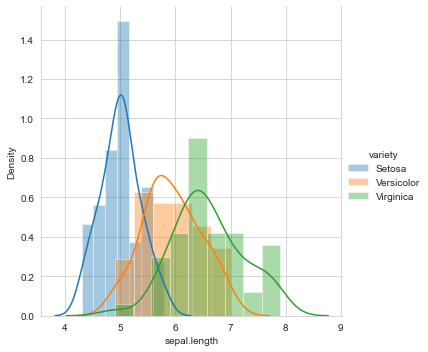

In [13]:
sns.FacetGrid(iris,hue="variety",size=5) \
 .map(sns.distplot,"sepal.length") \
 .add_legend();
plt.show();


C:\Users\vipulvm\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\vipulvm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vipulvm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vipulvm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `d

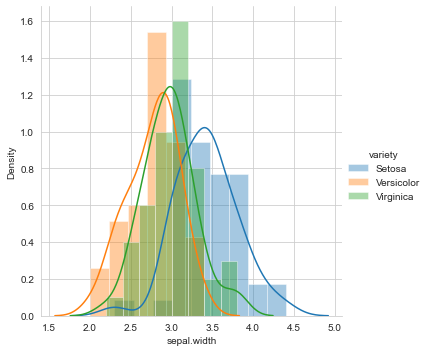

In [33]:
sns.FacetGrid(iris,hue="variety",size=5) \
 .map(sns.distplot,"sepal.width") \
 .add_legend();
plt.show();


C:\Users\vipulvm\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\vipulvm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vipulvm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vipulvm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `d

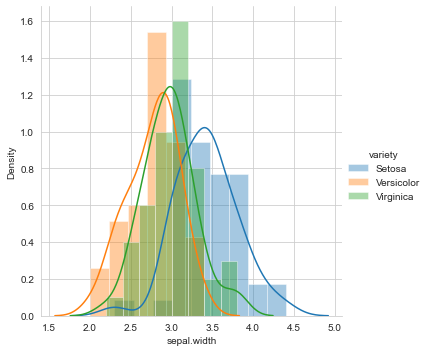

In [38]:
sns.FacetGrid(iris,hue="variety",size=5) \
 .map(sns.distplot,"sepal.width") \
 .add_legend();
plt.show();


C:\Users\vipulvm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vipulvm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vipulvm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

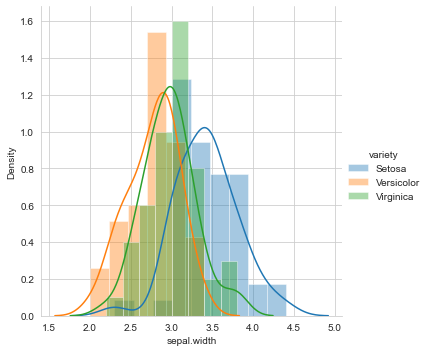

In [39]:
sns.FacetGrid(iris,hue="variety",height=5) \
 .map(sns.distplot,"sepal.width") \
 .add_legend();
plt.show();


[0.02 0.02 0.04 0.14 0.26 0.26 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


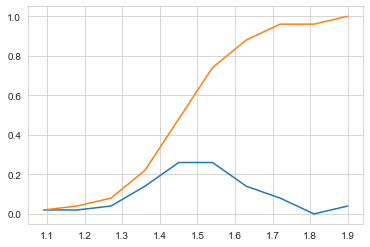

In [44]:
#need for cumulative distribution function(cdf)
#we can visually see what percentage of versicolor flowers have a 
#petal.length of less than 1.6?
#how to construct a cdf ?
#how to read a cdf ?
#plot cdf of petal.legth
counts,bin_edges=np.histogram(iris_setosa['petal.length'],bins=10,
 density=True)
pdf=counts/(sum(counts))
print(pdf);
print(bin_edges)
#compute cdf 
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


[0.02 0.02 0.04 0.14 0.26 0.26 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


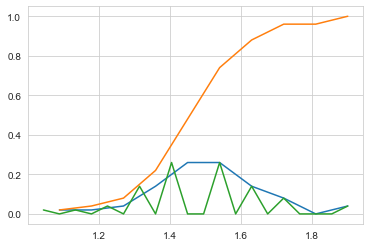

In [15]:
counts, bin_edges = np.histogram(iris_setosa['petal.length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(iris_setosa['petal.length'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

plt.show();


[0.02 0.02 0.04 0.14 0.26 0.26 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


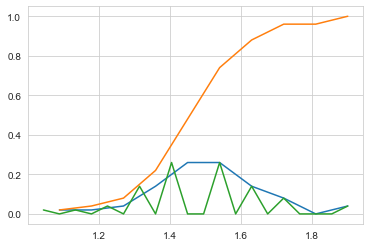

In [16]:
# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of versicolor flowers have a 
# petal_length of less than 5?
# How to construct a CDF?
# How to read a CDF?
#Plot CDF of petal_length
counts, bin_edges = np.histogram(iris_setosa['petal.length'], bins=10, 
 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
counts, bin_edges = np.histogram(iris_setosa['petal.length'], bins=20, 
 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);
plt.show();


[0.02 0.02 0.04 0.14 0.26 0.26 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]
[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]


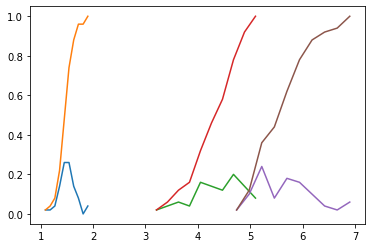

In [8]:
#plot of cdf of petal length for various types of flowers.
#misclassification error if you use petal length nly.
counts,bin_edges = np.histogram(iris_setosa['petal.length'],bins=10,
 density=True)
pdf=counts/sum(counts)
print(pdf);
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
counts,bin_edges = np.histogram(iris_versicolor['petal.length'],bins=10,
 density=True)
pdf=counts/sum(counts)
print(pdf);
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
#virginica
counts,bin_edges=np.histogram(iris_virginica['petal.length'],bins=10, 
 density=True)
pdf=counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show();


In [18]:
#mean,variance,std-dviation,
print("means:")
print(np.mean(iris_setosa["petal.length"]))
#mean with an outlier.
print(np.mean(np.append(iris_setosa["petal.length"],50)));
print(np.mean(iris_virginica["petal.length"]))
print(np.mean(iris_versicolor["petal.length"]))
print("\nstd-dev:");
print(np.std(iris_setosa["petal.length"]))
print(np.std(iris_virginica["petal.length"]))
print(np.std(iris_versicolor["petal.length"]))


means:
1.4620000000000002
2.4137254901960787
5.552
4.26

std-dev:
0.17191858538273286
0.5463478745268441
0.4651881339845204


In [19]:
#median,quantiles,percentiles,IQR.
print("\nMedians:")
print(np.median(iris_setosa["petal.length"]))
#Median with an outlier
print(np.median(np.append(iris_setosa["petal.length"],50)));
print(np.median(iris_virginica["petal.length"]))
print(np.median(iris_versicolor["petal.length"]))




Medians:
1.5
1.5
5.55
4.35


In [20]:
print("\nQuantiles:")
print(np.percentile(iris_setosa["petal.length"],np.arange(0,100,25)))
print(np.percentile(iris_virginica["petal.length"],np.arange(0,100,25)))
print(np.percentile(iris_versicolor["petal.length"],np.arange(0,100,25)))


Quantiles:
[1.    1.4   1.5   1.575]
[4.5   5.1   5.55  5.875]
[3.   4.   4.35 4.6 ]


In [21]:
print("\n90th Percentile:")
print(np.percentile(iris_setosa["petal.length"],90))
print(np.percentile(iris_virginica["petal.length"],90))
print(np.percentile(iris_versicolor["petal.length"],90))


90th Percentile:
1.7
6.31
4.8


In [22]:
from statsmodels import robust
print("\nMedian Absolute  Deviation")
print(robust.mad(iris_setosa["petal.length"]))

print(robust.mad(iris_virginica["petal.length"]))
print(robust.mad(iris_versicolor["petal.length"]))


Median Absolute  Deviation
0.14826022185056031
0.6671709983275211
0.5189107764769602


array([[<AxesSubplot:title={'center':'petal.length'}, xlabel='[variety]'>,
        <AxesSubplot:title={'center':'petal.width'}, xlabel='[variety]'>],
       [<AxesSubplot:title={'center':'sepal.length'}, xlabel='[variety]'>,
        <AxesSubplot:title={'center':'sepal.width'}, xlabel='[variety]'>]],
      dtype=object)

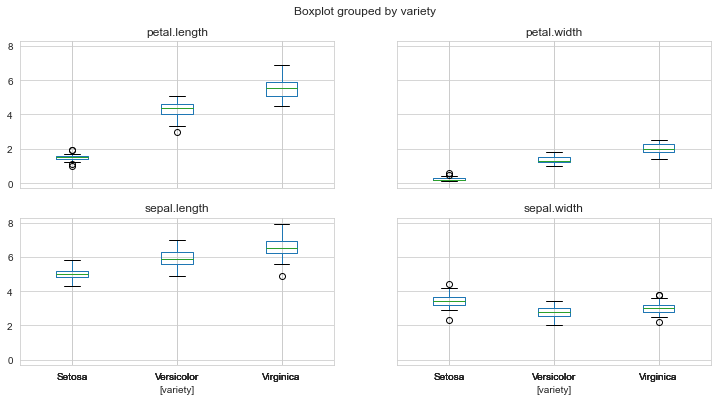

In [14]:
iris.boxplot(by="variety", figsize=(12, 6))

Further, we see that the box plots describe that the setosa usually has smaller features with few outliers.
The Versicolor species has average features
The virginica species has the longest features widths and lengths as compared to others.

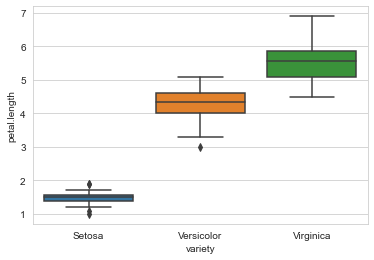

In [23]:
#box plot with whiskers : another method of visualizing the 1-D scatter plot
#the concept of median,percentile , quantile.
#howto draw the box in the box-plot?
#how to draw whiskers:[no standard way] could use min and max or use other 
#IQR like idea 
#note in the plot below, a technique call inter quarantile range is used in 
#whiskers in th  plot below do not correspond to the min and max values.
#box-plot can be visualized as a pdf o the side ways.
import seaborn as sns
sns.boxplot(x='variety',y='petal.length',data=iris)

plt.show()

We can further see the distributions using the violin plot on our dataset

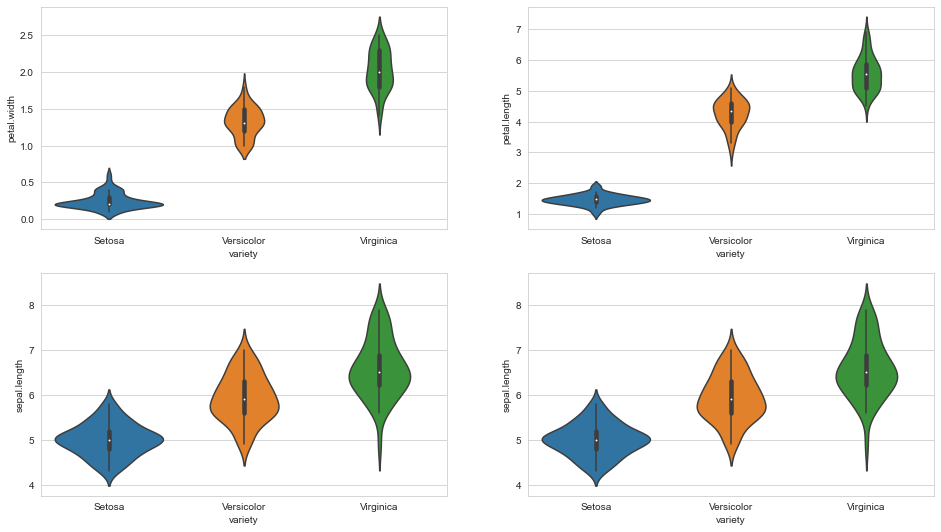

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.violinplot(y="petal.width", x= "variety", data=iris,  orient='v' , ax=axes[0, 0])
sns.violinplot(y="petal.length", x= "variety", data=iris,  orient='v' , ax=axes[0, 1])
sns.violinplot(y="sepal.length", x= "variety", data=iris,  orient='v' , ax=axes[1, 0])
sns.violinplot(y="sepal.length", x= "variety", data=iris,  orient='v' , ax=axes[1, 1])
plt.show()

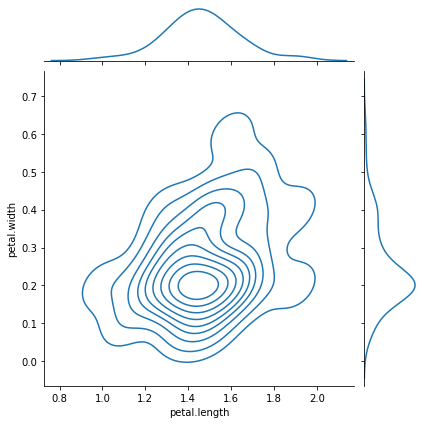

In [10]:
#2D density plot, contors-plots
sns.jointplot(x="petal.length",y="petal.width",data=iris_setosa,kind="kde")
plt.show()

# Correlation Between Variables

In [17]:
iris.corr()

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.117570,0.871754,0.817941
sepal.width,-0.117570,1.000000,-0.428440,-0.366126
petal.length,0.871754,-0.428440,1.000000,0.962865
petal.width,0.817941,-0.366126,0.962865,1.000000


Further, we can visualise this correlation using a heatmap.

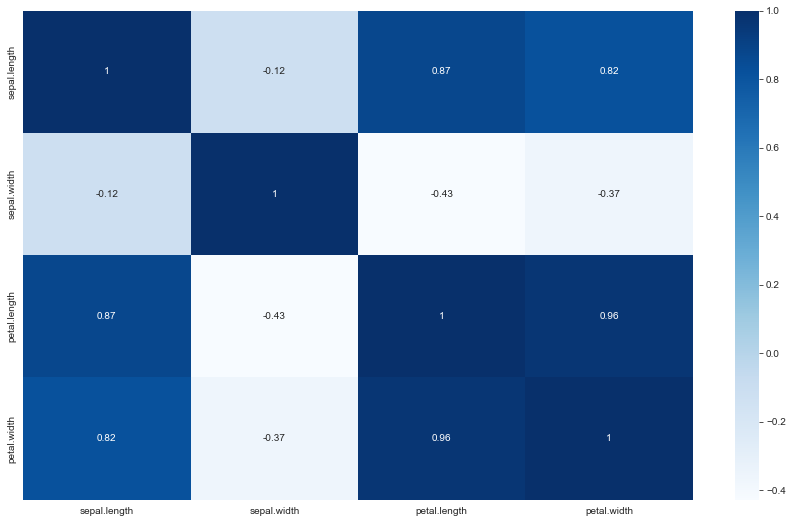

In [19]:
fig = plt.figure(figsize = (15,9))
sns.heatmap(iris.corr(), cmap='Blues', annot = True);

From the above heatmap, we see that petal_length and petal_width have a high correlation, petal_width and sepal_length have good correlation as well as petal_length and sepal_length have good correlations.

# Conclusion
The dataset is balanced i.e. equal records are present for all three species.
We have four numerical columns while just one categorical column which in turn is our target column.
A strong correlation is present between petal width and petal length.
The setosa species is the most easily distinguishable because of its small feature size.
The Versicolor and Virginica species are usually mixed and are sometimes hard to separate, while usually Versicolor has average feature sizes and virginica has larger feature sizes.


# As it's a classification problem. We are going to use a classification algorithms to build a model. Let's begin,

In [21]:
# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm

Now, we are going to split the data in training and testing sets.

In [26]:
train, test = train_test_split(iris, test_size = 0.3) #  I am taking the attribute test_size=0.3
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [28]:
train_X = train[['sepal.length','sepal.width','petal.length','petal.width']]# taking the training data features
train_y=train.variety # output of our training data
test_X= test[['sepal.length','sepal.width','petal.length','petal.width']] # taking test data features
test_y =test.variety   #output value of test data

Now, lets check the Train and Test Dataset

In [29]:
train_X.head()

,sepal.length,sepal.width,petal.length,petal.width
56,6.3,3.3,4.7,1.6
42,4.4,3.2,1.3,0.2
107,7.3,2.9,6.3,1.8
68,6.2,2.2,4.5,1.5
63,6.1,2.9,4.7,1.4


In [30]:
test_X.head()

,sepal.length,sepal.width,petal.length,petal.width
83,6.0,2.7,5.1,1.6
121,5.6,2.8,4.9,2.0
49,5.0,3.3,1.4,0.2
1,4.9,3.0,1.4,0.2
98,5.1,2.5,3.0,1.1


In [31]:
train_y.head() #output of the training data

56     Versicolor
42         Setosa
107     Virginica
68     Versicolor
63     Versicolor
Name: variety, dtype: object

# Support Vector Machine (SVM) :



In [32]:
# Applying SVM
model = svm.SVC() 
model.fit(train_X,train_y) 
prediction=model.predict(test_X) 
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,test_y))

The accuracy of the SVM is: 0.9555555555555556


As you can see SVM is giving us a very good accuracy. Let's continue to check other classification algorithms.

# Logistic Regression:

In [33]:
# Applying logistic regression
model = LogisticRegression()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Logistic Regression is 0.9555555555555556


# Decision Tree:

In [34]:
# Applying decision tree
model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Decision Tree is 0.9333333333333333



# K-Nearest Neighbors :

In [35]:
model=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_y))

The accuracy of the KNN is 0.9333333333333333


 Now, let's check the accuracy for various values of n for K-Nearest neighbors

C:\Users\vipulvm\AppData\Local\Temp/ipykernel_16544/2122472731.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=pd.Series()


([<matplotlib.axis.XTick at 0x219f2071f40>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

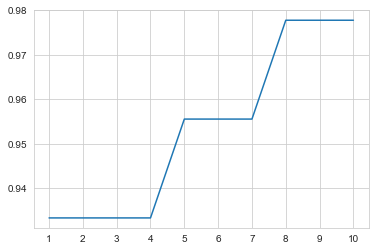

In [36]:
a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_y)))
plt.plot(a_index, a)
plt.xticks(x)